In [71]:
import os
import ast
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as maskUtils

In [72]:
dataset_path = "./dataset"
img_path = os.path.join(dataset_path, "images")
annot_path = os.path.join(dataset_path, "annotation")
captions_path = os.path.join(annot_path, "captions_val2017.json")
instances_path = os.path.join(annot_path, "instances_val2017.json")
person_path = os.path.join(annot_path, "person_keypoints_val2017.json")
stuff_path = os.path.join(annot_path, "stuff_val2017.json")

In [73]:
for i in glob.glob(os.path.join(img_path, "*.jpg")):
    print(i)

./dataset/images/000000000139.jpg


In [74]:
import json

with open(captions_path, 'r') as file:
    capt_json = json.load(file)
with open(instances_path, 'r') as file:
    inst_json = json.load(file)
with open(person_path, 'r') as file:
    pers_json = json.load(file)
with open(stuff_path, 'r') as file:
    stuf_json = json.load(file)

In [75]:
capt_json.keys(), inst_json.keys(), pers_json.keys(), stuf_json.keys()

(dict_keys(['info', 'licenses', 'images', 'annotations']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'images', 'licenses', 'categories', 'annotations']))

In [76]:
capt_json['images'][0].keys(), capt_json['annotations'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['image_id', 'id', 'caption']))

In [77]:
inst_json['images'][0].keys(), inst_json['annotations'][0].keys(), inst_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name']))

In [78]:
pers_json['images'][0].keys(), pers_json['annotations'][0].keys(), pers_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name', 'keypoints', 'skeleton']))

In [79]:
stuf_json['images'][0].keys(), stuf_json['annotations'][0].keys(), stuf_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name']))

In [80]:
import pandas as pd

df_capt_images = pd.DataFrame(capt_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_capt_annota = pd.DataFrame(capt_json['annotations'])

In [81]:
df_inst_images = pd.DataFrame(inst_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_inst_annota = pd.DataFrame(inst_json['annotations'])
df_inst_catego = pd.DataFrame(inst_json['categories'])

In [82]:
df_pers_images = pd.DataFrame(pers_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_pers_annota = pd.DataFrame(pers_json['annotations'])
df_pers_catego = pd.DataFrame(pers_json['categories'])

In [83]:
df_stuf_images = pd.DataFrame(stuf_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_stuf_annota = pd.DataFrame(stuf_json['annotations'])
df_stuf_catego = pd.DataFrame(stuf_json['categories'])

In [84]:
pd.merge(df_capt_images, df_capt_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').drop(columns=["id_y", "id_x"])

,file_name,height,width,image_id,caption
0,000000397133.jpg,427,640,397133,A man is in a kitchen making pizzas.
1,000000397133.jpg,427,640,397133,Man in apron standing on front of oven with pa...
2,000000397133.jpg,427,640,397133,A baker is working in the kitchen rolling dough.
3,000000397133.jpg,427,640,397133,A person standing by a stove in a kitchen.
4,000000397133.jpg,427,640,397133,A table with pies being made and a person stan...
...,...,...,...,...,...
25009,000000015335.jpg,480,640,15335,A group of people sitting at a table with food.
25010,000000015335.jpg,480,640,15335,"A man, woman, and boy are sitting at a table."
25011,000000015335.jpg,480,640,15335,"A man, woman and child eating together at a re..."
25012,000000015335.jpg,480,640,15335,A boy sitting between a man and a woman.


In [85]:
pd.merge(df_inst_images, df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').drop(columns=["id_y", "id_x"])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id
0,000000397133.jpg,427,640,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44
1,000000397133.jpg,427,640,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67
2,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1
3,000000397133.jpg,427,640,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49
4,000000397133.jpg,427,640,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51
...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1
36777,000000015335.jpg,480,640,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47
36778,000000015335.jpg,480,640,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77
36779,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1


In [86]:
df_inst_images.merge(df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_inst_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id,supercategory,name
0,000000397133.jpg,427,640,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44,kitchen,bottle
1,000000397133.jpg,427,640,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67,furniture,dining table
2,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1,person,person
3,000000397133.jpg,427,640,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49,kitchen,knife
4,000000397133.jpg,427,640,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51,kitchen,bowl
...,...,...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1,person,person
36777,000000015335.jpg,480,640,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47,kitchen,cup
36778,000000015335.jpg,480,640,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77,electronic,cell phone
36779,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1,person,person


In [87]:
df_pers_images.merge(df_pers_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_pers_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,num_keypoints,area,iscrowd,keypoints_x,image_id,bbox,category_id,supercategory,name,keypoints_y,skeleton
0,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",13,17376.91885,0,"[433, 94, 2, 434, 90, 2, 0, 0, 0, 443, 98, 2, ...",397133,"[388.66, 69.92, 109.41, 277.62]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
1,000000397133.jpg,427,640,"[[0.43, 299.58, 2.25, 299.58, 9.05, 287.78, 32...",1,1037.78190,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",397133,"[0, 262.81, 62.16, 36.77]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
2,000000252219.jpg,428,640,"[[361.81, 368.51, 337.11, 369.76, 342.14, 359....",17,8511.15680,0,"[356, 198, 2, 358, 193, 2, 351, 194, 2, 364, 1...",252219,"[326.28, 174.56, 71.24, 197.25]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
3,000000252219.jpg,428,640,"[[51.12, 277.38, 51.12, 270.21, 50.1, 262.7, 5...",15,8349.28485,0,"[100, 190, 2, 0, 0, 0, 96, 185, 2, 0, 0, 0, 86...",252219,"[9.79, 167.06, 121.94, 226.45]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
4,000000252219.jpg,428,640,"[[576.11, 331.6, 577.82, 337.57, 581.23, 340.1...",15,11337.31575,0,"[536, 192, 1, 538, 188, 2, 0, 0, 0, 552, 190, ...",252219,"[510.44, 171.27, 123.66, 215.76]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,000000015335.jpg,480,640,"[[561.65, 162.93, 548.86, 162.93, 541.45, 162....",2,2982.31285,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15335,"[541.45, 21.21, 75.07, 141.72]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11000,000000015335.jpg,480,640,"[[400.45, 53.65, 382.13, 70.08, 379.79, 79, 37...",4,9835.36940,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 386, 88, 2, 444, 8...",15335,"[343.63, 53.65, 167.62, 111.74]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11001,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",3,5697.13675,0,"[232, 121, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, ...",15335,"[160.39, 66.68, 77.99, 84.69]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11002,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",0,453.39980,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15335,"[362.44, 102.44, 24.23, 27.7]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."


In [88]:
df_stuf_images.merge(df_stuf_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_stuf_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id,supercategory,name
0,000000397133.jpg,427,640,{'counts': ']i`11Z=0N2L5YDJdN2^;5nE1n93kE1T:0k...,5184.0,0,397133,"[117.0, 0.0, 193.0, 131.0]",94,plant,branch
1,000000397133.jpg,427,640,{'counts': 'eh]52U=5L5K3L5YC]Oa<h0M4K4M3L4M4M2...,3280.0,0,397133,"[416.0, 219.0, 81.0, 108.0]",98,furniture-stuff,cabinet
2,000000397133.jpg,427,640,{'counts': 'fUj31Y=1O1O1O1O1O1O1N2O1O1O1O1O1O1...,28614.0,0,397133,"[292.0, 311.0, 348.0, 116.0]",115,floor,floor-other
3,000000397133.jpg,427,640,{'counts': 'Vh_47k<90000001O0000000000001O0000...,691.0,0,397133,"[344.0, 309.0, 46.0, 22.0]",116,floor,floor-stone
4,000000397133.jpg,427,640,{'counts': '\982R1e;lN]DT1c;jN_DV1`;hNcDc0P<]O...,196.0,0,397133,"[0.0, 288.0, 17.0, 64.0]",121,food-stuff,food-other
...,...,...,...,...,...,...,...,...,...,...,...
32796,000000015335.jpg,480,640,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,14525.0,0,15335,"[23.0, 370.0, 229.0, 110.0]",137,textile,napkin
32797,000000015335.jpg,480,640,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,3040.0,0,15335,"[483.0, 432.0, 110.0, 48.0]",139,raw-material,paper
32798,000000015335.jpg,480,640,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,8162.0,0,15335,"[236.0, 384.0, 390.0, 96.0]",165,furniture-stuff,table
32799,000000015335.jpg,480,640,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,34477.0,0,15335,"[0.0, 0.0, 557.0, 158.0]",172,wall,wall-concrete


In [106]:
df_inst_annota.iloc[0]['segmentation']

[[510.66,
  423.01,
  511.72,
  420.03,
  510.45,
  416.0,
  510.34,
  413.02,
  510.77,
  410.26,
  510.77,
  407.5,
  510.34,
  405.16,
  511.51,
  402.83,
  511.41,
  400.49,
  510.24,
  398.16,
  509.39,
  397.31,
  504.61,
  399.22,
  502.17,
  399.64,
  500.89,
  401.66,
  500.47,
  402.08,
  499.09,
  401.87,
  495.79,
  401.98,
  490.59,
  401.77,
  488.79,
  401.77,
  485.39,
  398.58,
  483.9,
  397.31,
  481.56,
  396.35,
  478.48,
  395.93,
  476.68,
  396.03,
  475.4,
  396.77,
  473.92,
  398.79,
  473.28,
  399.96,
  473.49,
  401.87,
  474.56,
  403.47,
  473.07,
  405.59,
  473.39,
  407.71,
  476.68,
  409.41,
  479.23,
  409.73,
  481.56,
  410.69,
  480.4,
  411.85,
  481.35,
  414.93,
  479.86,
  418.65,
  477.32,
  420.03,
  476.04,
  422.58,
  479.02,
  422.58,
  480.29,
  423.01,
  483.79,
  419.93,
  486.66,
  416.21,
  490.06,
  415.57,
  492.18,
  416.85,
  491.65,
  420.24,
  492.82,
  422.9,
  493.56,
  424.39,
  496.43,
  424.6,
  498.02,
  423.01,
  498.1

In [90]:
df_total_catego = pd.concat([df_inst_catego, df_stuf_catego], axis=0, ignore_index=True)
df_total_catego

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane
...,...,...,...
167,water,179,waterdrops
168,window,180,window-blind
169,window,181,window-other
170,solid,182,wood


In [91]:
df_inst_images.merge(df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many')

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44,82445
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67,119568
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1,200887
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49,693231
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51,713388
...,...,...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,15335,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1,1753431
36777,000000015335.jpg,480,640,15335,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47,1879878
36778,000000015335.jpg,480,640,15335,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77,1976132
36779,000000015335.jpg,480,640,15335,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1,2025828


In [92]:
df_stuf_images.merge(df_stuf_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many')

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y
0,000000397133.jpg,427,640,397133,{'counts': ']i`11Z=0N2L5YDJdN2^;5nE1n93kE1T:0k...,5184.0,0,397133,"[117.0, 0.0, 193.0, 131.0]",94,20022062
1,000000397133.jpg,427,640,397133,{'counts': 'eh]52U=5L5K3L5YC]Oa<h0M4K4M3L4M4M2...,3280.0,0,397133,"[416.0, 219.0, 81.0, 108.0]",98,20022063
2,000000397133.jpg,427,640,397133,{'counts': 'fUj31Y=1O1O1O1O1O1O1N2O1O1O1O1O1O1...,28614.0,0,397133,"[292.0, 311.0, 348.0, 116.0]",115,20022064
3,000000397133.jpg,427,640,397133,{'counts': 'Vh_47k<90000001O0000000000001O0000...,691.0,0,397133,"[344.0, 309.0, 46.0, 22.0]",116,20022065
4,000000397133.jpg,427,640,397133,{'counts': '\982R1e;lN]DT1c;jN_DV1`;hNcDc0P<]O...,196.0,0,397133,"[0.0, 288.0, 17.0, 64.0]",121,20022066
...,...,...,...,...,...,...,...,...,...,...,...
32796,000000015335.jpg,480,640,15335,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,14525.0,0,15335,"[23.0, 370.0, 229.0, 110.0]",137,20000943
32797,000000015335.jpg,480,640,15335,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,3040.0,0,15335,"[483.0, 432.0, 110.0, 48.0]",139,20000944
32798,000000015335.jpg,480,640,15335,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,8162.0,0,15335,"[236.0, 384.0, 390.0, 96.0]",165,20000945
32799,000000015335.jpg,480,640,15335,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,34477.0,0,15335,"[0.0, 0.0, 557.0, 158.0]",172,20000946


In [93]:
df_stuf_annota['segmentation'][0]

{'counts': 'j19[6h1ZNXNf1h1ZNYNe1g1[NYNf1f1YNZNh1e1YN^Nd1b1ZNbNd1^1ZNdNf1\\1ZNdNf1\\1ZNdNlKLo4_1UOBj0>kNNRLUNi4l1UO0RLUNh4k1UO;l0DTO<R1^OnNb0R1^OnNc0T1ZOlNg0X1TOhNm0V1SOkNm0T1TOlNl0T1TOjNbNmKZ2X5UOkNm0V1ROkNm0T1TOlNk0U1UOlNj0T1UOmNk0S1UOmNk0S1UOmNk0S1UOmNl0R1TOoNk0l0gMmJ01^1W4j0j0kMoJ[1W4j0j0kMoJ[1X4i0a0UNVKQ1Z4j0`0D@<`0D@<`0D@<`0D@<`0D@<`0D@=?CA=?BB>=CC==CB>:FF:?A@`0a0_O_Oa0b0^O_Ob0`0^O_Oc0a0]O@b0`0]OCa0<@D`0;AE?:BG=8DI;7EI<6DK;1I06OJ35MK35MK35MK35MK35MK45KK55KK55KK55KK64JK75IK75IK75IK75IK75IK84HL85GJ:6FJ:6FJ;5EK;5EK;5EK;5EK;5EK:7EI;7EH;9EG::FF9;GE9;GE9;GE9<EE:<FD:<FC;=EC=;CE=;CE<<DD<<DD=;CE=<BD?WNWKM5k1U41P1JPO6P1JoN7Q1IoN7Q1IoN7R1HnN8Q1JnN5S1KmN5S1KmN5S1KmN5T1JlN6T1JlN6T1JlN6S1KlN6P1SNkJg1U45n0WNmJe1T44o0XNlJd1U44o0XNkJe1V43o03QOMm0TNmJo1V4Mj08VOHi0:VOFk09UOGk09UOGk09UOFl0:SOGn08ROHn08ROHn08ROHn08UOEk0;WOCk0;VODk0<TOWNgKR1Y5c0ROYNeKT1Y5c0oNZNjKS1W5c0nNZNUMJn3k1nNZNb2f1aMWN_2j1aMSNeKOk6m1`40000002N1O2N01N10000O010O10002N001O000010O0000O10001M2L`D\\Nb;c1301VOZDMh;L_DEP<J`me33\\SZL5L4K

In [94]:
df_total_images = pd.concat([df_inst_images, df_stuf_images], axis=0, ignore_index=True).drop_duplicates()
df_total_images.sort_values(by="file_name")

,file_name,height,width,id
4145,000000000139.jpg,426,640,139
3513,000000000285.jpg,640,586,285
4979,000000000632.jpg,483,640,632
407,000000000724.jpg,500,375,724
1332,000000000776.jpg,640,428,776
...,...,...,...,...
3058,000000581317.jpg,354,640,581317
3532,000000581357.jpg,612,612,581357
4918,000000581482.jpg,427,640,581482
881,000000581615.jpg,640,478,581615


In [142]:
def polygonFromMask(row):
    if isinstance(row['segmentation'], dict) and 'counts' in row['segmentation']:
        if row['iscrowd'] == 1:
            row['segmentation'] = [row['segmentation']['counts']]
        else:
            rle_data = maskUtils.decode(row['segmentation'])
            contours, _ = cv2.findContours(rle_data, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
            segmentation = []
            for contour in contours:
                if contour.size >= 6:
                    segmentation.append(contour.flatten().tolist())
        
            row['segmentation'] = segmentation
    
    return row

In [117]:
df_stuf_annota.iloc[0]

segmentation    {'counts': 'j19[6h1ZNXNf1h1ZNYNe1g1[NYNf1f1YNZ...
area                                                      25483.0
iscrowd                                                         0
image_id                                                      139
bbox                                    [0.0, 38.0, 549.0, 297.0]
category_id                                                    98
id                                                       20000000
Name: 0, dtype: object

In [143]:
df_total_annota = pd.concat([df_inst_annota, df_stuf_annota], axis=0, ignore_index=True).drop(columns=["id"])
df_total_annota = df_total_annota.apply(polygonFromMask, axis=1)
df_total_annota

,segmentation,area,iscrowd,image_id,bbox,category_id
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18
2,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",78969.31690,0,472375,"[124.71, 196.18, 372.85, 356.81]",18
3,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",108316.66515,0,520301,"[112.71, 154.82, 367.29, 479.35]",18
4,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",75864.53530,0,579321,"[200.61, 89.65, 400.22, 251.02]",18
...,...,...,...,...,...,...
69577,"[[426, 428, 425, 429, 423, 429, 422, 430, 418,...",83419.00000,0,581781,"[0.0, 0.0, 640.0, 478.0]",122
69578,"[[0, 203, 0, 221, 5, 226, 5, 227, 8, 230, 8, 2...",1167.00000,0,581781,"[0.0, 203.0, 40.0, 40.0]",123
69579,"[[165, 475, 164, 476, 157, 476, 156, 477, 155,...",52789.00000,0,581781,"[0.0, 0.0, 578.0, 478.0]",139
69580,"[[447, 407, 447, 419, 446, 420, 445, 420, 444,...",1473.00000,0,581781,"[428.0, 407.0, 51.0, 71.0]",143


In [146]:
df_combined = df_total_images.merge(df_total_annota, left_on="id", right_on="image_id", how="inner", validate="one_to_many").drop(columns=["image_id"])
df_combined['area'] = df_combined['area'].apply(lambda x: round(x, 2))
df_combined

,file_name,height,width,id,segmentation,area,iscrowd,bbox,category_id
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38,0,"[217.62, 240.54, 38.99, 57.75]",44
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62,0,"[1.0, 240.24, 346.63, 186.76]",67
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.92,0,"[388.66, 69.92, 109.41, 277.62]",1
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19,0,"[135.57, 249.43, 22.32, 28.79]",49
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.47,0,"[31.28, 344.0, 68.12, 40.83]",51
...,...,...,...,...,...,...,...,...,...
69577,000000015335.jpg,480,640,15335,"[[96, 370, 95, 371, 85, 371, 84, 372, 80, 372,...",14525.00,0,"[23.0, 370.0, 229.0, 110.0]",137
69578,000000015335.jpg,480,640,15335,"[[509, 432, 508, 433, 499, 433, 498, 434, 497,...",3040.00,0,"[483.0, 432.0, 110.0, 48.0]",139
69579,000000015335.jpg,480,640,15335,"[[236, 433, 236, 434, 238, 436, 238, 442, 242,...",8162.00,0,"[236.0, 384.0, 390.0, 96.0]",165
69580,000000015335.jpg,480,640,15335,"[[167, 59, 163, 63, 161, 63, 160, 64, 159, 64,...",34477.00,0,"[0.0, 0.0, 557.0, 158.0]",172


In [147]:
agg_func = {
    'segmentation': list,
    'bbox': list,
    'category_id': list,
    'area': list
}
temp = df_combined.groupby(['file_name', 'height', 'width', 'id']).agg(agg_func).reset_index()
temp

,file_name,height,width,id,segmentation,bbox,category_id,area
0,000000000139.jpg,426,640,139,"[[[240.86, 211.31, 240.16, 197.19, 236.98, 192...","[[236.98, 142.51, 24.7, 69.5], [7.03, 167.76, ...","[64, 72, 72, 62, 62, 62, 62, 1, 1, 78, 82, 84,...","[531.81, 13244.66, 5833.12, 2245.34, 1833.78, ..."
1,000000000285.jpg,640,586,285,"[[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21,...","[[1.43, 68.81, 584.57, 563.94], [0.0, 0.0, 586...","[23, 124, 183]","[275709.81, 88715.0, 275827.0]"
2,000000000632.jpg,483,640,632,"[[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, ...","[[3.27, 266.85, 401.23, 208.25], [183.36, 136....","[65, 64, 84, 84, 84, 84, 84, 62, 64, 84, 84, 8...","[64019.88, 2464.93, 203.66, 214.53, 179.12, 18..."
3,000000000724.jpg,500,375,724,"[[[122.51, 174.51, 120.07, 110.94, 159.68, 71....","[[120.07, 71.83, 134.49, 153.08], [123.39, 279...","[13, 8, 3, 13, 97, 111, 149, 157, 183]","[16433.58, 418.08, 79.6, 327.17, 9244.0, 10337..."
4,000000000776.jpg,640,428,776,"[[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34,...","[[1.44, 56.22, 344.51, 471.35], [2.88, 278.2, ...","[88, 88, 88, 65, 167, 183]","[65916.27, 84877.21, 79751.66, 27071.28, 8140...."
...,...,...,...,...,...,...,...,...
4995,000000581317.jpg,354,640,581317,"[[[413.66, 163.89, 406.82, 147.7, 407.96, 143....","[[406.82, 142.23, 21.43, 36.25], [409.85, 55.9...","[77, 1, 97, 124, 135, 157, 183]","[311.76, 33684.52, 33318.0, 50691.0, 11218.0, ..."
4996,000000581357.jpg,612,612,581357,"[[[270.93, 314.71, 269.56, 239.07, 290.18, 221...","[[262.68, 93.29, 220.04, 247.55], [428.92, 400...","[1, 1, 1, 1, 1, 1, 41, 15, 1, 1, 1, 1, 15, 1, ...","[18526.87, 459.61, 276.19, 286.73, 457.94, 205..."
4997,000000581482.jpg,427,640,581482,"[[[404.93, 263.72, 407.81, 236.85, 410.69, 226...","[[404.93, 205.18, 103.63, 100.76], [517.31, 21...","[85, 85, 102, 130, 172, 181, 183]","[8122.43, 1420.0, 36420.0, 2076.0, 129815.0, 8..."
4998,000000581615.jpg,640,478,581615,"[[[222.04, 621.13, 162.54, 568.89, 145.12, 497...","[[139.32, 386.03, 191.56, 235.1], [0.0, 0.0, 4...","[70, 123, 132, 176, 183]","[34120.52, 90044.0, 5014.0, 176577.0, 34106.0]"


In [148]:
nested_cols = agg_func.keys()

for col in nested_cols:
    temp[col] = temp[col].apply(json.dumps)

temp.to_parquet('results.parquet', engine='pyarrow', compression='snappy')

In [29]:
df_combined["bbox"] = df_combined.apply(lambda row:  [row['category_id'], row['bbox']], axis=1)
df_combined.drop(columns="category_id", inplace=True)
df_combined

,file_name,height,width,id,segmentation,bbox
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....","[44, [217.62, 240.54, 38.99, 57.75]]"
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...","[67, [1.0, 240.24, 346.63, 186.76]]"
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...","[1, [388.66, 69.92, 109.41, 277.62]]"
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...","[49, [135.57, 249.43, 22.32, 28.79]]"
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...","[51, [31.28, 344.0, 68.12, 40.83]]"
...,...,...,...,...,...,...
69577,000000015335.jpg,480,640,15335,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,"[137, [23.0, 370.0, 229.0, 110.0]]"
69578,000000015335.jpg,480,640,15335,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,"[139, [483.0, 432.0, 110.0, 48.0]]"
69579,000000015335.jpg,480,640,15335,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,"[165, [236.0, 384.0, 390.0, 96.0]]"
69580,000000015335.jpg,480,640,15335,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,"[172, [0.0, 0.0, 557.0, 158.0]]"


In [30]:
agg_functions = {
    "height": 'first',
    "width": 'first',
    "segmentation": lambda x: ', '.join(x.astype(str)),
    "bbox": lambda x: ', '.join(x.astype(str))
}

In [31]:
df_combined = df_combined.groupby(by="file_name").agg(agg_functions).reset_index()
df_combined

,file_name,height,width,segmentation,bbox
0,000000000139.jpg,426,640,"[[240.86, 211.31, 240.16, 197.19, 236.98, 192....","[64, [236.98, 142.51, 24.7, 69.5]], [72, [7.03..."
1,000000000285.jpg,640,586,"[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21, ...","[23, [1.43, 68.81, 584.57, 563.94]], [124, [0...."
2,000000000632.jpg,483,640,"[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, 2...","[65, [3.27, 266.85, 401.23, 208.25]], [64, [18..."
3,000000000724.jpg,500,375,"[[122.51, 174.51, 120.07, 110.94, 159.68, 71.8...","[13, [120.07, 71.83, 134.49, 153.08]], [8, [12..."
4,000000000776.jpg,640,428,"[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34, ...","[88, [1.44, 56.22, 344.51, 471.35]], [88, [2.8..."
...,...,...,...,...,...
4995,000000581317.jpg,354,640,"[[413.66, 163.89, 406.82, 147.7, 407.96, 143.3...","[77, [406.82, 142.23, 21.43, 36.25]], [1, [409..."
4996,000000581357.jpg,612,612,"[[270.93, 314.71, 269.56, 239.07, 290.18, 221....","[1, [262.68, 93.29, 220.04, 247.55]], [1, [428..."
4997,000000581482.jpg,427,640,"[[404.93, 263.72, 407.81, 236.85, 410.69, 226....","[85, [404.93, 205.18, 103.63, 100.76]], [85, [..."
4998,000000581615.jpg,640,478,"[[222.04, 621.13, 162.54, 568.89, 145.12, 497....","[70, [139.32, 386.03, 191.56, 235.1]], [123, [..."


In [32]:
selected = df_combined.iloc[0]
selected

file_name                                        000000000139.jpg
height                                                        426
width                                                         640
segmentation    [[240.86, 211.31, 240.16, 197.19, 236.98, 192....
bbox            [64, [236.98, 142.51, 24.7, 69.5]], [72, [7.03...
Name: 0, dtype: object

In [33]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(426, 640, 3)

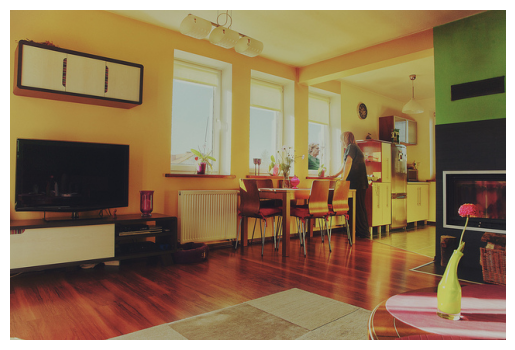

In [34]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [35]:
import ast

bbox = ast.literal_eval(selected['bbox'])
bbox

([64, [236.98, 142.51, 24.7, 69.5]],
 [72, [7.03, 167.76, 149.32, 94.87]],
 [72, [557.21, 209.19, 81.35, 78.73]],
 [62, [358.98, 218.05, 56.0, 102.83]],
 [62, [290.69, 218.0, 61.83, 98.48]],
 [62, [413.2, 223.01, 30.17, 81.36]],
 [62, [317.4, 219.24, 21.58, 11.59]],
 [1, [412.8, 157.61, 53.05, 138.01]],
 [1, [384.43, 172.21, 15.12, 35.74]],
 [78, [512.22, 205.75, 14.74, 15.97]],
 [82, [493.1, 174.34, 20.29, 108.31]],
 [84, [604.77, 305.89, 14.34, 45.71]],
 [84, [613.24, 308.24, 12.88, 46.44]],
 [85, [447.77, 121.12, 13.97, 21.88]],
 [86, [549.06, 309.43, 36.68, 89.67]],
 [86, [350.76, 208.84, 11.37, 22.55]],
 [62, [412.25, 219.02, 9.63, 12.52]],
 [86, [241.24, 194.99, 14.22, 17.63]],
 [86, [336.79, 199.5, 9.73, 16.73]],
 [67, [321.21, 231.22, 125.56, 88.93]],
 [98, [0.0, 38.0, 549.0, 297.0]],
 [102, [136.0, 0.0, 473.0, 116.0]],
 [105, [444.0, 226.0, 20.0, 11.0]],
 [118, [0.0, 269.0, 564.0, 157.0]],
 [119, [338.0, 166.0, 29.0, 50.0]],
 [123, [292.0, 246.0, 348.0, 111.0]],
 [130, [212.0,

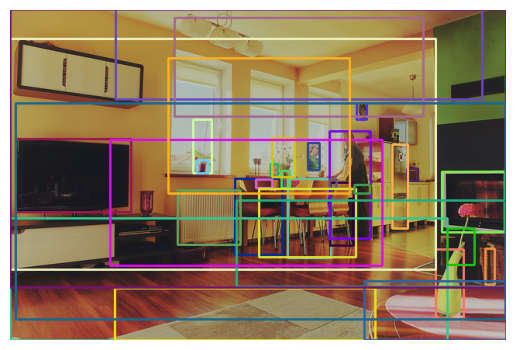

In [36]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
for i in bbox:
    color = [random.randint(0, 255) for _ in range(3)]
    x, y, w, h = i[1]
    x, y, w, h = int(x), int(y), int(w), int(h)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [37]:
df_total_catego[df_total_catego['name'] == "tv"]
for i in bbox:
    print(df_total_catego[df_total_catego['id'] == int(i[0])].values)

[['furniture' 64 'potted plant']]
[['electronic' 72 'tv']]
[['electronic' 72 'tv']]
[['furniture' 62 'chair']]
[['furniture' 62 'chair']]
[['furniture' 62 'chair']]
[['furniture' 62 'chair']]
[['person' 1 'person']]
[['person' 1 'person']]
[['appliance' 78 'microwave']]
[['appliance' 82 'refrigerator']]
[['indoor' 84 'book']]
[['indoor' 84 'book']]
[['indoor' 85 'clock']]
[['indoor' 86 'vase']]
[['indoor' 86 'vase']]
[['furniture' 62 'chair']]
[['indoor' 86 'vase']]
[['indoor' 86 'vase']]
[['furniture' 67 'dining table']]
[['furniture-stuff' 98 'cabinet']]
[['ceiling' 102 'ceiling-other']]
[['textile' 105 'clothes']]
[['floor' 118 'floor-wood']]
[['plant' 119 'flower']]
[['furniture-stuff' 123 'furniture-other']]
[['furniture-stuff' 130 'light']]
[['raw-material' 132 'metal']]
[['plant' 142 'plant-other']]
[['textile' 152 'rug']]
[['furniture-stuff' 156 'shelf']]
[['furniture-stuff' 165 'table']]
[['wall' 172 'wall-concrete']]
[['window' 181 'window-other']]
[['other' 183 'other']]


In [38]:
segmentation = ast.literal_eval(selected['segmentation'])
segmentation

([[240.86,
   211.31,
   240.16,
   197.19,
   236.98,
   192.26,
   237.34,
   187.67,
   245.8,
   188.02,
   243.33,
   176.02,
   250.39,
   186.96,
   251.8,
   166.85,
   255.33,
   142.51,
   253.21,
   190.49,
   261.68,
   183.08,
   258.86,
   191.2,
   260.98,
   206.37,
   254.63,
   199.66,
   252.51,
   201.78,
   251.8,
   212.01]],
 [[9.66, 167.76, 156.35, 173.04, 153.71, 256.48, 82.56, 262.63, 7.03, 260.87]],
 [[563.33, 209.19, 637.69, 209.19, 638.56, 287.92, 557.21, 280.04]],
 [[368.16,
   252.94,
   383.77,
   255.69,
   384.69,
   235.49,
   389.28,
   226.31,
   392.03,
   219.89,
   413.15,
   218.05,
   411.31,
   241.92,
   411.31,
   256.61,
   412.23,
   274.05,
   414.98,
   301.6,
   414.98,
   316.29,
   412.23,
   311.7,
   406.72,
   290.58,
   405.8,
   270.38,
   389.28,
   270.38,
   381.01,
   270.38,
   383.77,
   319.04,
   377.34,
   320.88,
   377.34,
   273.14,
   358.98,
   266.71,
   358.98,
   253.86,
   370.91,
   253.86]],
 [[319.32,
   230.

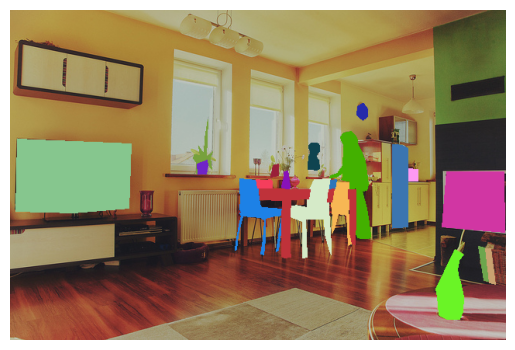

In [39]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
alpha = 0.5

overlay = img.copy()
for seg_data in segmentation:
    color = [random.randint(0, 255) for _ in range(3)]
    if isinstance(seg_data, list):
        # Handle polygon format (list of coordinates)
        for poly in seg_data:
            # Convert list of floats to a numpy array of integers, reshaped to (N, 1, 2)
            points = np.array(poly).reshape((-1, 1, 2)).astype(int)
            # Fill the polygon on the overlay
            cv2.fillPoly(overlay, [points], color)
    # elif isinstance(seg_data, dict) and 'counts' in seg_data:
    #     # Handle RLE format (dictionary with 'size' and 'counts')
    #     rle = seg_data
    #     # Decode RLE to a binary mask
    #     binary_mask = maskUtils.decode(rle)
    #     # Expand mask to 3 channels to apply color
    #     color_mask = np.zeros_like(overlay, dtype=np.uint8)
    #     color_mask[binary_mask == 1] = color
    #     # Add the RLE mask to the overlay
    #     overlay = cv2.addWeighted(overlay, 1, color_mask, 1, 0)

# img = cv2.addWeighted(img, 1 - alpha, overlay, alpha, 0)
img.shape

plt.imshow(overlay)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [149]:
test_df = pd.read_parquet('results.parquet')
test_df

,file_name,height,width,id,segmentation,bbox,category_id,area
0,000000000139.jpg,426,640,139,"[[[240.86, 211.31, 240.16, 197.19, 236.98, 192...","[[236.98, 142.51, 24.7, 69.5], [7.03, 167.76, ...","[64, 72, 72, 62, 62, 62, 62, 1, 1, 78, 82, 84,...","[531.81, 13244.66, 5833.12, 2245.34, 1833.78, ..."
1,000000000285.jpg,640,586,285,"[[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21,...","[[1.43, 68.81, 584.57, 563.94], [0.0, 0.0, 586...","[23, 124, 183]","[275709.81, 88715.0, 275827.0]"
2,000000000632.jpg,483,640,632,"[[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, ...","[[3.27, 266.85, 401.23, 208.25], [183.36, 136....","[65, 64, 84, 84, 84, 84, 84, 62, 64, 84, 84, 8...","[64019.88, 2464.93, 203.66, 214.53, 179.12, 18..."
3,000000000724.jpg,500,375,724,"[[[122.51, 174.51, 120.07, 110.94, 159.68, 71....","[[120.07, 71.83, 134.49, 153.08], [123.39, 279...","[13, 8, 3, 13, 97, 111, 149, 157, 183]","[16433.58, 418.08, 79.6, 327.17, 9244.0, 10337..."
4,000000000776.jpg,640,428,776,"[[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34,...","[[1.44, 56.22, 344.51, 471.35], [2.88, 278.2, ...","[88, 88, 88, 65, 167, 183]","[65916.27, 84877.21, 79751.66, 27071.28, 8140...."
...,...,...,...,...,...,...,...,...
4995,000000581317.jpg,354,640,581317,"[[[413.66, 163.89, 406.82, 147.7, 407.96, 143....","[[406.82, 142.23, 21.43, 36.25], [409.85, 55.9...","[77, 1, 97, 124, 135, 157, 183]","[311.76, 33684.52, 33318.0, 50691.0, 11218.0, ..."
4996,000000581357.jpg,612,612,581357,"[[[270.93, 314.71, 269.56, 239.07, 290.18, 221...","[[262.68, 93.29, 220.04, 247.55], [428.92, 400...","[1, 1, 1, 1, 1, 1, 41, 15, 1, 1, 1, 1, 15, 1, ...","[18526.87, 459.61, 276.19, 286.73, 457.94, 205..."
4997,000000581482.jpg,427,640,581482,"[[[404.93, 263.72, 407.81, 236.85, 410.69, 226...","[[404.93, 205.18, 103.63, 100.76], [517.31, 21...","[85, 85, 102, 130, 172, 181, 183]","[8122.43, 1420.0, 36420.0, 2076.0, 129815.0, 8..."
4998,000000581615.jpg,640,478,581615,"[[[222.04, 621.13, 162.54, 568.89, 145.12, 497...","[[139.32, 386.03, 191.56, 235.1], [0.0, 0.0, 4...","[70, 123, 132, 176, 183]","[34120.52, 90044.0, 5014.0, 176577.0, 34106.0]"


In [41]:
cols = ['segmentation', 'bbox', 'category_id']
for col in cols:
    test_df[col] = test_df[col].apply(ast.literal_eval)
test_df = test_df.explode(cols, ignore_index=True).reset_index(drop=True)
test_df

,file_name,height,width,id,segmentation,bbox,category_id
0,000000000139.jpg,426,640,139,"[[240.86, 211.31, 240.16, 197.19, 236.98, 192....","[236.98, 142.51, 24.7, 69.5]",64
1,000000000139.jpg,426,640,139,"[[9.66, 167.76, 156.35, 173.04, 153.71, 256.48...","[7.03, 167.76, 149.32, 94.87]",72
2,000000000139.jpg,426,640,139,"[[563.33, 209.19, 637.69, 209.19, 638.56, 287....","[557.21, 209.19, 81.35, 78.73]",72
3,000000000139.jpg,426,640,139,"[[368.16, 252.94, 383.77, 255.69, 384.69, 235....","[358.98, 218.05, 56.0, 102.83]",62
4,000000000139.jpg,426,640,139,"[[319.32, 230.98, 317.41, 220.68, 296.03, 218....","[290.69, 218.0, 61.83, 98.48]",62
...,...,...,...,...,...,...,...
69577,000000581781.jpg,478,640,581781,{'counts': '0[6c0\Lf4e3ZKZLf4b1mJfM>g0e4U1^KQN...,"[0.0, 0.0, 640.0, 478.0]",122
69578,000000581781.jpg,478,640,581781,{'counts': '[6c0\>0O1O100O2N1O101N2N1O2N1O010O...,"[0.0, 203.0, 40.0, 40.0]",123
69579,000000581781.jpg,478,640,581781,{'counts': 'e9T4j:O1YL[ET3Y;N1O10001O000000010...,"[0.0, 0.0, 578.0, 478.0]",139
69580,000000581781.jpg,478,640,581781,{'counts': 'cVX64j>2N0[AL_>5_AO_>702O0O2aB@^<`...,"[428.0, 407.0, 51.0, 71.0]",143


In [42]:
from pycocotools import mask
t = test_df[test_df['id'] == 139]

full_mask = np.zeros((t['height'][0], t['width'][0]), dtype=np.uint8)

In [48]:
total_polygons = []
for i in t['segmentation'].to_list():
    if isinstance(i, dict):
        binary_mask = mask.decode(i)
        binary_mask_8u = np.asfortranarray(binary_mask, dtype=np.uint8)
        # Find contours
        contours, _ = cv2.findContours(binary_mask_8u, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        segmentation_polygons = []
        print(len(contours))
        for contour in contours:
            # Flatten the contour and convert to a list
            polygon = contour.flatten().tolist()
            # COCO polygons require at least 3 points (6 coordinates)
            if len(polygon) >= 6:
                print(f"\t polygons = {len(polygon)}")
                segmentation_polygons.append(polygon)
        print(f"\t Total = {len(segmentation_polygons)}")
        total_polygons.append(segmentation_polygons)
    else:
        total_polygons.append([])

4
	 polygons = 216
	 polygons = 58
	 polygons = 304
	 polygons = 404
	 Total = 4
2
	 polygons = 240
	 polygons = 632
	 Total = 2
4
	 polygons = 10
	 Total = 1
2
	 polygons = 1440
	 Total = 1
1
	 polygons = 138
	 Total = 1
12
	 polygons = 8
	 polygons = 142
	 polygons = 124
	 polygons = 60
	 polygons = 68
	 polygons = 40
	 polygons = 58
	 polygons = 20
	 Total = 8
2
	 polygons = 120
	 polygons = 286
	 Total = 2
1
	 polygons = 240
	 Total = 1
11
	 polygons = 16
	 polygons = 72
	 polygons = 28
	 Total = 3
1
	 polygons = 546
	 Total = 1
2
	 polygons = 302
	 polygons = 158
	 Total = 2
2
	 polygons = 292
	 Total = 1
23
	 polygons = 342
	 polygons = 24
	 polygons = 40
	 polygons = 68
	 polygons = 60
	 polygons = 38
	 polygons = 10
	 polygons = 34
	 polygons = 68
	 polygons = 16
	 polygons = 2542
	 polygons = 44
	 polygons = 52
	 polygons = 316
	 polygons = 12
	 polygons = 10
	 polygons = 28
	 Total = 17
9
	 polygons = 316
	 polygons = 252
	 polygons = 312
	 polygons = 156
	 Total = 4
21
	 pol

In [60]:
t['rle'] = total_polygons

/tmp/ipykernel_184761/2882171783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['rle'] = total_polygons


In [67]:
df_total_catego[df_total_catego['id'] == 181]

,supercategory,id,name
169,window,181,window-other


In [61]:
t.iloc[20:]

,file_name,height,width,id,segmentation,bbox,category_id,rle
20,000000000139.jpg,426,640,139,{'counts': 'j19[6h1ZNXNf1h1ZNYNe1g1[NYNf1f1YNZ...,"[0.0, 38.0, 549.0, 297.0]",98,"[[125, 259, 124, 260, 113, 260, 112, 261, 102,..."
21,000000000139.jpg,426,640,139,{'counts': '`bh11Y=1O1O1O1O001O001O001O001O001...,"[136.0, 0.0, 473.0, 116.0]",102,"[[523, 65, 522, 66, 520, 66, 519, 67, 515, 67,..."
22,000000000139.jpg,426,640,139,"{'counts': 'omh51Y=0ng31PXL01O10iW10ThN1PPY2',...","[444.0, 226.0, 20.0, 11.0]",105,"[[456, 234, 455, 235, 455, 236, 457, 234, 458,..."
23,000000000139.jpg,426,640,139,{'counts': '_:k2_:00000O1000000000000O10000000...,"[0.0, 269.0, 564.0, 157.0]",118,"[[550, 269, 549, 270, 549, 273, 548, 274, 546,..."
24,000000000139.jpg,426,640,139,{'counts': 'Qi\4:k<6O1bCAo;`0kC@M1W<n0O0N12O1O...,"[338.0, 166.0, 29.0, 50.0]",119,"[[344, 166, 344, 167, 343, 168, 339, 168, 339,..."
25,000000000139.jpg,426,640,139,{'counts': 'Vgi3:1I55W<k0KJ5JRD_Od;MnC8;0i;GnC...,"[292.0, 246.0, 348.0, 111.0]",123,"[[607, 324, 606, 325, 606, 327, 607, 328], [55..."
26,000000000139.jpg,426,640,139,{'counts': 'oVh21Y=1O1O002NO02M3M4M2N11O01O001...,"[212.0, 11.0, 321.0, 127.0]",130,"[[513, 84, 510, 87, 510, 99, 511, 100, 511, 10..."
27,000000000139.jpg,426,640,139,{'counts': 'VTj2>d;LZE6d:LZE6`:_OeD`0g00f:3YE5...,"[216.0, 233.0, 81.0, 70.0]",132,"[[224, 233, 223, 234, 219, 234, 220, 235, 219,..."
28,000000000139.jpg,426,640,139,{'counts': '`nZ71W=0O1001O00000000cj00dTO0\D1c...,"[564.0, 282.0, 35.0, 47.0]",142,"[[568, 320, 567, 321, 567, 322, 566, 323, 566,..."
29,000000000139.jpg,426,640,139,{'counts': ']bh13W=0O100O10000O1000000O1000000...,"[135.0, 359.0, 336.0, 67.0]",152,"[[363, 359, 361, 361, 358, 361, 357, 362, 355,..."


In [ ]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
alpha = 0.5

overlay = img.copy()
for seg_data in t.iloc[20:]['rle'].to_list():
    color = [random.randint(0, 255) for _ in range(3)]
    if isinstance(seg_data, list):
        # Handle polygon format (list of coordinates)
        for poly in seg_data:
            # Convert list of floats to a numpy array of integers, reshaped to (N, 1, 2)
            points = np.array(poly).reshape((-1, 1, 2)).astype(int)
            # Fill the polygon on the overlay
            cv2.fillPoly(overlay, [points], color)
    # elif isinstance(seg_data, dict) and 'counts' in seg_data:
    #     # Handle RLE format (dictionary with 'size' and 'counts')
    #     rle = seg_data
    #     # Decode RLE to a binary mask
    #     binary_mask = maskUtils.decode(rle)
    #     # Expand mask to 3 channels to apply color
    #     color_mask = np.zeros_like(overlay, dtype=np.uint8)
    #     color_mask[binary_mask == 1] = color
    #     # Add the RLE mask to the overlay
    #     overlay = cv2.addWeighted(overlay, 1, color_mask, 1, 0)

# img = cv2.addWeighted(img, 1 - alpha, overlay, alpha, 0)
img.shape

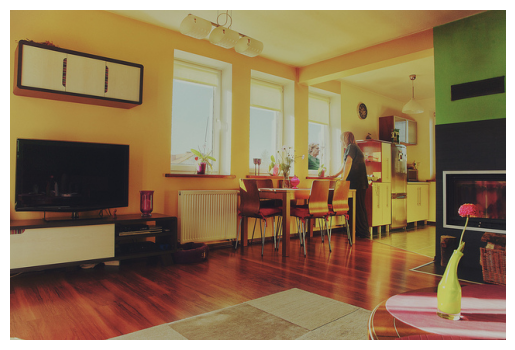

In [65]:
plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [70]:
mask.decode(t.iloc[20:]['segmentation'].to_list()[-2])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

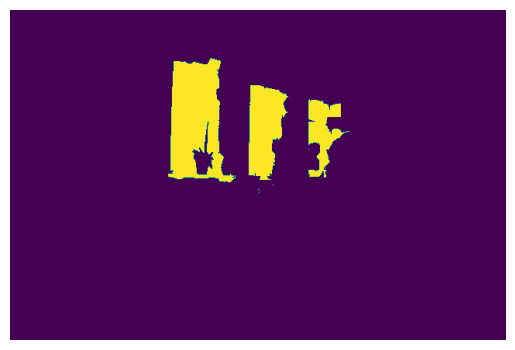

In [68]:
plt.imshow(mask.decode(t.iloc[20:]['segmentation'].to_list()[-2]))
plt.grid(visible=False)
plt.axis('off')
plt.show()